In [1]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to noun

def pre_process_text(text):
    print("Original Text:")
    print(text, "\n")

    # Step 1: Lowercasing
    text = text.lower()
    print("After Lowercasing:")
    print(text, "\n")

    # Step 2: Removing special characters, numbers, and punctuation
    text = re.sub(r"[^a-z\s]", "", text)
    print("After Removing Special Characters and Numbers:")
    print(text, "\n")

    # Step 3: Removing extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    print("After Removing Extra Spaces:")
    print(text, "\n")

    # Step 4: Removing single-character words
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    print("After Removing Single-Character Words:")
    print(text, "\n")

    # Step 5: Tokenization (splitting into words)
    words = text.split()
    print("After Tokenization:")
    print(words, "\n")

    # Step 6: Removing stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    print("After Removing Stopwords:")
    print(words, "\n")

    # Step 7: POS Tagging
    pos_tags = pos_tag(words)
    print("After POS Tagging:")
    print(pos_tags, "\n")

    # Step 8: Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word, _ in pos_tags]
    print("After Stemming:")
    print(stemmed_words, "\n")

    # Step 9: Lemmatization with POS tags
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    print("After Lemmatization:")
    print(lemmatized_words, "\n")

    # Step 10: Removing short words (less than 3 characters)
    final_words = [word for word in lemmatized_words if len(word) >= 3]
    print("After Removing Short Words:")
    print(final_words, "\n")

    # Combine words back to a single string
    processed_text = " ".join(final_words)
    print("Final Processed Text:")
    print(processed_text)
    return processed_text


# Dummy text for testing
text = """
Hey! I'm a guy who likes riding bikes, cars, and playing football.
Sometimes, I read books. Oh! I don't like wasting time on 1234 nonsense.
"""

# Calling the function
all_text = pre_process_text(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original Text:

Hey! I'm a guy who likes riding bikes, cars, and playing football.
Sometimes, I read books. Oh! I don't like wasting time on 1234 nonsense.
 

After Lowercasing:

hey! i'm a guy who likes riding bikes, cars, and playing football.
sometimes, i read books. oh! i don't like wasting time on 1234 nonsense.
 

After Removing Special Characters and Numbers:

hey im a guy who likes riding bikes cars and playing football
sometimes i read books oh i dont like wasting time on  nonsense
 

After Removing Extra Spaces:
hey im a guy who likes riding bikes cars and playing football sometimes i read books oh i dont like wasting time on nonsense 

After Removing Single-Character Words:
hey im  guy who likes riding bikes cars and playing football sometimes  read books oh  dont like wasting time on nonsense 

After Tokenization:
['hey', 'im', 'guy', 'who', 'likes', 'riding', 'bikes', 'cars', 'and', 'playing', 'football', 'sometimes', 'read', 'books', 'oh', 'dont', 'like', 'wasting', 'time



# Word Cloud


In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# Ensure NLTK resources are downloaded (if not already)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Create Dummy Data
text = " Automobili Lamborghini S.p.A., usually referred to as Lamborghini or colloquially Lambo, (Italian: [autoˈmɔːbili lamborˈɡiːni]) is an Italian manufacturer of luxury sports cars and SUVs based in Sant'Agata Bolognese. The company is owned by the Volkswagen Group through its subsidiary Audi. Ferruccio Lamborghini (1916–1993), an Italian manufacturing magnate, founded Automobili Ferruccio Lamborghini S.p.A. in 1963 to compete with Ferrari. The company was noted for using a rear mid-engine, rear-wheel drive layout. Lamborghini grew rapidly during its first decade, but sales plunged in the wake of the 1973 worldwide financial downturn and the oil crisis. The firm's ownership changed three times after 1973, including a bankruptcy in 1978. American Chrysler Corporation took control of Lamborghini in 1987 and sold it to Malaysian investment group Mycom Setdco and Indonesian group V'Power Corporation in 1994. In 1998, Mycom Setdco and V'Power sold Lamborghini to the Volkswagen Group where it was placed under the control of the group's Audi division. New products and model lines were introduced to the brand's portfolio and brought to the market and saw an increased productivity for the brand. In the late 2000s, during the Great Recession, Lamborghini's sales dropped nearly 50%.Lamborghini currently produces the V10-powered Huracán, the Urus SUV powered by a twin-turbo V8 engine, and the Revuelto, a V12/electric hybrid, as of 2024. In addition, the company produces V12 engines for offshore powerboat racing.Lamborghini Trattori, founded in 1948 by Ferruccio Lamborghini, is headquartered in Pieve di Cento, Italy, and continues to produce tractors. Since 1973, Lamborghini Trattori has been a separate entity from the Lamborghini's automobile division."


# Step 2: Preprocessing the Text Data
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenization (splitting into words)
    words = text.split()
    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


# Combine all the cleaned text into one string for Word Cloud generation
all_text = preprocess_text(text)

# Step 3: Generate the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(all_text)

# Step 4: Visualize the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes around the plot
plt.title("Word Cloud Visualization", fontsize=16)
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

(659, 383, 4)


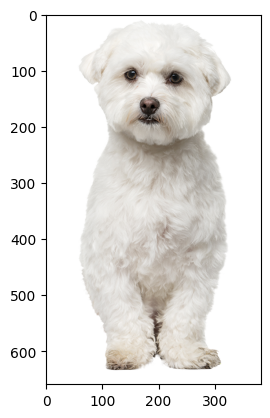

In [7]:
background_image = np.array(Image.open('/workspaces/Natural-Language-Processing/maltese-dog-bichon-frise-havanese-dog-bolognese-dog-bolonka-white-dog-bd847a15efea9eb9033f349ed0f06b9.png'))
plt.imshow(background_image)
print(background_image.shape)


In [8]:
word_cloud2 = WordCloud(background_color = 'white',mask = background_image,
               width = 4048, height = 2024).generate(text)

# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined